加载文件
            0     1      2
0           1     2  0.065
1           1     3  0.086
2           1     4  0.066
3           1     5  0.095
4           1     6  0.059
5           1     7  0.026
6           1     8  0.075
7           1     9  0.037
8           1    10  0.045
9           1    11  0.026
10          1    12  0.093
11          1    13  0.002
12          1    14  0.058
13          1    15  0.030
14          1    16  0.054
15          1    17  0.079
16          1    18  0.062
17          1    19  0.018
18          1    20  0.051
19          1    21  0.021
20          1    22  0.028
21          1    23  0.044
22          1    24  0.047
23          1    25  0.055
24          1    26  0.029
25          1    27  0.061
26          1    28  0.028
27          1    29  0.078
28          1    30  0.042
29          1    31  0.107
...       ...   ...    ...
1998970  1992  1999  0.538
1998971  1992  2000  0.562
1998972  1993  1994  0.252
1998973  1993  1995  0.303
1998974  1993  1996  0.

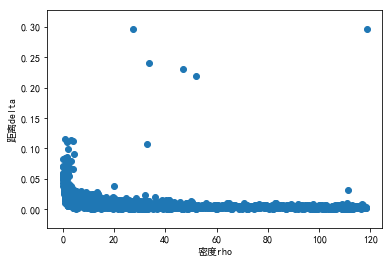

please input rho密度最小值5
please input delta距离最小值0.15
NUMBER OF CLUSTERS: 5 

Performing assignation
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入打点
进入

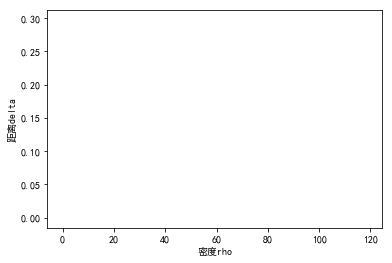

打点结束


In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


#防止绘图出现乱码的问题
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

#加载文件
print("加载文件")
xx=pd.read_csv('example_distances.csv',sep=" ",header=None)

NL=max(xx[0])
ND=max(xx[1])
print(NL)
if NL>ND:
    ND=NL #确保 ND 取为第一二列最大值中的较大者，并将其作为数据点总数
N = len(xx)#距离个数  xx 第一个维度的长度，相当于文件的行数（即距离的总个数）

#初始化为dist数组为0
print(ND)
dist=np.zeros([ND,ND])
print(dist.shape[0])
#print(xx[2][2000])

#为dist数组赋值
# print(1999*1999)
for i in range(N):
    ii = xx[0][i]-1
    jj = xx[1][i]-1
    #将距离赋予矩阵
    dist[ii][jj]=xx[2][i]
    dist[jj][ii]=xx[2][i]
# 测试赋值所需时间

#取截断距离
percent=2.0
print("average percentage of neighbours:",percent)

position=round(N*percent/100); #round 是一个四舍五入函数
#sort_values()是dataframe的函数
sda=xx[2].sort_values().tolist()
#print(type(sda))
# print(len(sda))
# print(sda[0:10])
dc=sda[position]
#输出截断距离
print("截断距离是:",dc)

#计算局部密度 rho(用Gaussian高斯核）
from math import exp

#1.将每个数据点的rho值初始化为0
rho=np.zeros(ND)
# print(rho)

#高斯核计算局部密度
for i in range(0,ND-1):
    for j in range(i+1,ND):
        rho[i]=rho[i]+exp(-(dist[i,j]/dc)*(dist[i,j]/dc))
        rho[j]=rho[j]+exp(-(dist[i,j]/dc)*(dist[i,j]/dc))

 #"Cut off" kernel

#for i in range(1,ND-1):
#  for j in range(i+1,ND):
#    if dist[i,j]<dc:
#       rho[i]=rho[i]+1.;
#       rho[j]=rho[j]+1.;

# 先求矩阵列最大值，再求最大值，最后得到所有距离值中的最大值
maxd=dist.max()
print(maxd)

#将密度rho降序排列，ordho保持序
ordrho = np.argsort(-1*rho)
rho_sorted =rho[ordrho]

#初始化delta数组和nneigh数组
delta=[maxd]*ND
nneigh=[0]*ND
 #处理 rho 值最大的数据点
delta[ordrho[0]] = -1
nneigh[ordrho[0]] = 0

#delta 和 nneigh 数组赋值
for ii in range(1,ND):
    for jj in range(0,ii):
        if dist[ordrho[ii],ordrho[jj]]<delta[ordrho[ii]]:
            delta[ordrho[ii]]=dist[ordrho[ii],ordrho[jj]]
            nneigh[ordrho[ii]]=ordrho[jj]
# 记录 rho 值更大的数据点中与 ordrho(ii) 距离最近的点的编号 ordrho(jj)

# 生成 rho 值最大数据点的 delta 值
delta[ordrho[0]]=max(delta)

# 决策图
print('Generated file:DECISION GRAPH')
print('column 1:Density')
print('column 2:Delta')
#开画图文件写画图文件
with open('DECISION_GRAPH','w') as fid:
    for i in range(ND):
        fid.write('%6.2f %6.2f\n'%(rho[i],delta[i]))
#选择一个围住类中心的矩形
#print('Select a rectangle enclosing cluster centers')
#scrsz = get(0,'ScreenSize');
#figure('Position',[6 72 scrsz(3)/4. scrsz(4)/1.3]);
plt.xlabel('密度rho')
plt.ylabel('距离delta')
plt.scatter(rho,delta)
plt.show()


#输入选取聚类中心的范围（最小值）
rhomin=int(input("please input rho密度最小值"))
deltamin=float(input("please input delta距离最小值"))

#初始化 cluster 个数
NCLUST=0;

# cl 为归属标志数组，cl[i]=j 表示第 i 号数据点归属于第 j 个 cluster
#先统一将 cl 初始化为 -1
cl=[-1]*ND
#初始化 点映射到类别列表
icl=[-1]*10

#在矩形区域内统计数据点（即聚类中心）的个数
for i in range(ND):
    if  (rho[i]>rhomin) and (delta[i]>deltamin):
        NCLUST=NCLUST+1;
        cl[i]=NCLUST # 第 i 号数据点属于第 NCLUST 个 cluster
        #icl[NCLUST]=i # 逆映射,第 NCLUST 个 cluster 的中心为第 i 号数据点

print('NUMBER OF CLUSTERS: %i \n'%NCLUST)
print('Performing assignation')

#将其他数据点归类 (assignation)
for i in range(ND):
    if (cl[ordrho[i]]==-1):
        cl[ordrho[i]]=cl[nneigh[ordrho[i]]]

#由于是按照 rho 值从大到小的顺序遍历,循环结束后, cl 应该都变成正的值了

halo=[-1]*ND
rho_aver=0
#处理光晕点：
if (NCLUST>1):
    for i in range(ND):
        halo[i]=cl[i]
    bord_rho=np.zeros(NCLUST+1)
#初始化数组 bord_rho 为 0,每个 cluster 定义一个 bord_rho 值
#获取每一个 cluster 中平均密度的一个界 bord_rho
    for i in range(ND - 1):
        for j in range(i+1,ND):
# 距离足够小但不属于同一个cluster的i和j
            if (cl[i]!=cl[j]) and (dist[i,j]<= dc):
                rho_aver = (rho[i] + rho[j]) / 2
# 取i, j两点的平均局部密度
                if rho_aver > bord_rho[cl[i]]:
                    bord_rho[cl[i]] = rho_aver

                if rho_aver > bord_rho[cl[j]]:
                    bord_rho[cl[j]] = rho_aver



#halo 值为 0 表示为 outlier
for i in range(ND):
    if rho[i]<bord_rho[cl[i]]:
        halo[i]=0

#逐一处理每个 cluster
for i in range(NCLUST):
    nc=0; #用于累计当前 cluster 中数据点的个数
    nh=0; # 用于累计当前 cluster 中核心数据点的个数
    for j in range(ND):
        if cl[j]==i:
            nc=nc+1

        if halo[j]==i:
            nh=nh+1

#写聚类后的打标文件
with open('clustered_data.txt','w') as fp:
    for i in range(ND):
        fp.write('%d,%6.2f,%6.2f,%d\n'%(i,rho[i],delta[i],cl[i]))


colors = ['b','g','r','orange','c','m','y','k','w','p','gray']
plt.xlabel('密度rho')
plt.ylabel('距离delta')
for i in range(ND):
    for j in range(len(colors)):
        if int(cl[i]) == j:
            plt.scatter(rho[i], delta[i],c=colors[j])
            continue
plt.show()
print("打点结束")











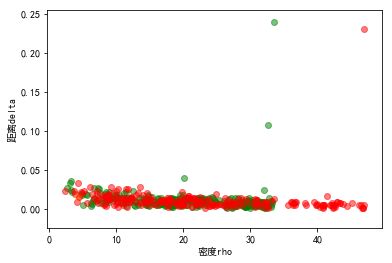

In [52]:

rho_cut=np.array(rho[:500])
delta_cut=np.array(delta[:500])
colors = ['blue','green','r','orange','c','m','y','k','w','p','gray']
plt.xlabel('密度rho')
plt.ylabel('距离delta')
for i in range(500):
    for j in range(len(colors)):
        if int(cl[i]) == j:
            plt.scatter(rho_cut[i], delta_cut[i], c=colors[j],alpha=0.5)
            continue
plt.show()

[27.46487192 22.77892793 28.16263102 30.44661963 22.67987805 31.89381182
 18.86405193 27.1445933  32.5659812  13.18332351 20.44932744 30.06386798
 28.15397039 28.87073382 18.40411274  7.55934365 22.69983297  5.5332061
 31.08187919 11.45311671 31.32478132 18.11611511 31.5073903  12.69221756
  8.47963391 28.84475166 31.73440834 19.77580226 26.4239386  13.43442069
 22.8224849  12.76733411  3.22591293 16.00219887 26.55539757 30.81351363
 29.25291771 26.58116806 20.50463032  5.4055     20.54272888 21.28732133
 27.21137136 31.40312344  6.67211627 23.52949303 26.49049538 25.36917835
  7.32231217 23.26042875]


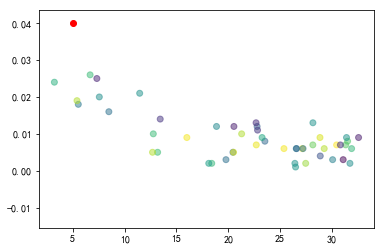

In [45]:
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.array(rho[:50])
print(x)
y = np.array(delta[:50])
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y,  c=colors, alpha=0.5)
plt.scatter(5,0.04,c='red')
plt.show()


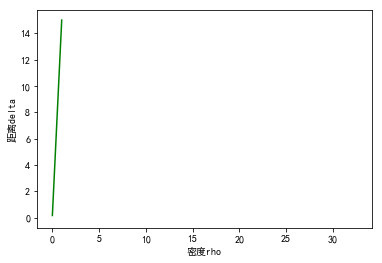

In [39]:
rho_cut=np.array(rho[:20])
delta_cut=np.array(delta[:20])
colors = ['blue*','green','r','orange','c','m','y','k','w','p','gray']
plt.xlabel('密度rho')
plt.ylabel('距离delta')
for i in range(20):
    for j in range(len(colors)):
        if int(cl[i]) == j:
            plt.plot(rho_cut[i], delta_cut[i], colors[j])
            continue
plt.plot([0.175,15],"green")
plt.show()

In [13]:
import scipy.io as scio
'''
使用scipy.io可以读取.mat文件。
'''
 
    
dataFile = 'Indian_pines.mat'
data = scio.loadmat(dataFile)
#print(data.keys())
print(data['indian_pines'].shape)
for i in range(220):
    print(data['indian_pines'][:,:,i])

(145, 145, 220)
[[3172 2580 3687 ... 2570 3170 3172]
 [2576 2747 2750 ... 3859 3686 2744]
 [2744 2576 2744 ... 2570 2576 2742]
 ...
 [3324 2983 2988 ... 2564 2730 3156]
 [3161 2727 2988 ... 3156 3159 2561]
 [2979 2977 2814 ... 3153 3155 3323]]
[[4142 4266 4266 ... 3890 4130 3890]
 [4388 4264 4268 ... 4512 4264 4268]
 [4146 4389 4273 ... 4266 4262 4142]
 ...
 [3728 3604 3612 ... 4115 4111 3991]
 [3731 3742 4114 ... 3858 3858 3866]
 [3728 3728 3728 ... 3864 4104 3860]]
[[4506 4502 4421 ... 4320 4320 4316]
 [4334 4592 4423 ... 4605 4690 4597]
 [4416 4416 4420 ... 4509 4496 4230]
 ...
 [4002 3829 3913 ... 4103 4103 4103]
 [3834 4011 4011 ... 4016 4100 4003]
 [3732 3741 3914 ... 4282 4106 4197]]
[[4279 4426 4498 ... 4261 4118 4136]
 [4279 4422 4431 ... 4578 4627 4284]
 [4132 4360 4570 ... 4271 4271 4271]
 ...
 [3726 3721 3659 ... 3963 4092 3883]
 [3799 3732 3803 ... 3879 3884 3960]
 [3648 3595 3871 ... 3889 4027 3952]]
[[4782 4853 5019 ... 4649 4592 4596]
 [4543 4719 4785 ... 5009 4852 5004

In [17]:
print(len(data['indian_pines'][0,0,:]))
print(data['indian_pines'][0,0,:])
'''
计算两个向量之间的欧氏距离。每个向量之间，以下标作为代号点写入高光谱csv文件。
'''
with oepn()

220
[3172 4142 4506 4279 4782 5048 5213 5106 5053 4750 4816 4769 4610 4805
 4828 4861 4767 4624 4549 4463 4462 4446 4445 4336 4381 4319 4207 4305
 4311 3991 4168 3942 4061 4362 4318 4252 4869 5284 5055 3591 5175 5217
 5058 4969 4721 4291 4555 4886 4868 4806 4783 4811 4709 3903 3795 3715
 2591 2130 2269 2480 3145 3626 4060 4296 4211 4225 4157 4133 4082 4048
 3935 3843 3784 3642 3271 2707 1707 1564 1838 1719 2229 2764 2919 2873
 2977 2913 3034 3051 3124 3101 3033 2713 2740 2947 2706 2834 2856 2683
 2400 2229 1822 1542 1097 1029 1020 1026 1009 1011 1047 1069 1100 1122
 1259 1365 1261 1374 1630 1851 2028 2130 2170 2205 2214 2204 2100 2106
 2146 2089 2078 2134 2127 2074 2057 2045 2003 1999 1959 1924 1883 1843
 1781 1716 1698 1645 1540 1410 1294 1131 1044 1029 1006 1017 1000  995
  997 1003 1016 1001 1003 1002 1005 1004 1008 1032 1045 1100 1212 1295
 1244 1100 1103 1216 1346 1330 1259 1251 1313 1372 1393 1402 1396 1381
 1396 1381 1353 1346 1341 1332 1324 1310 1318 1330 1310 1292 1280 1275
 1